<a href="https://colab.research.google.com/github/Jyoti-S-Shukla/Machine-learning-models/blob/main/Regression_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Regression Part 2**

In this Lab we will look into the shortcomings of Linear Regression and see how those problems can be solved using Logistic Regression. We will also explore Polynomian Regression

  1. Polynomial Regression
  2. Linear Regression on a specific pattern of data to observe shortcomings
  3. Logistic Regression to solve those problems

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Polynomial Regression

1. Generate data using relation $y=0.25x^{3}+1.25x^{2}-3x-3$
2. Corrupt y by adding random noise (uniformly sampled)
3. Fit the generated curve using different polynomial order. (Using matrix inversion and gradient descent)

In [ ]:
## Use the Regression class defined in the previous lab
class regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable
  def grad_update(self,w_old,lr,y,x):
    #write code here
    Derivative = (-2/y.shape[0]) * (x @ (y - (np.matmul(x.T,w_old))))
    w = w_old - lr*Derivative
    return w

  def error(self,w,y,x):
    loss = np.square(y - (np.matmul(x.T,w)))
    cost = np.sum(loss)/y.shape[0]
    return cost
    

  def mat_inv(self,y,x_aug):
    mat_inv =np.matmul((np.linalg.pinv(np.matmul(x_aug,x_aug.T))),
                       (np.matmul(x_aug,y)))
     # write code here
    
    return mat_inv

  # By Gradien descent
  
  def Regression_grad_des(self,x,y,lr):
    tolerance = 0.00001
    w_old = np.random.rand(x.shape[0],1)
    diff_1 = 1
    diff_2 = 0
    error_grad = []
    for i in range(1000):
      # write code here
      while (diff_1 - diff_2)> tolerance:
        diff_1 = self.error(w_old,y,x)
        w_old = self.grad_update(w_old,lr,y,x)
        diff_2 = self.error(w_old,y,x)
        error_grad.append(diff_1)
      w_new= w_old

    return w_new,error_grad



Text(0.5, 1.0, '4-Degree Polynoimal')

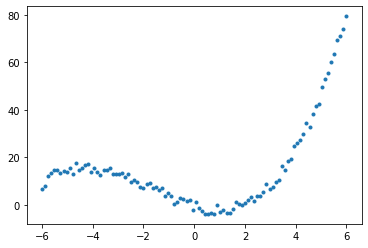

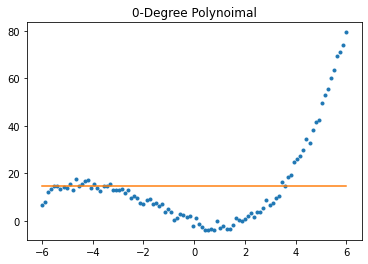

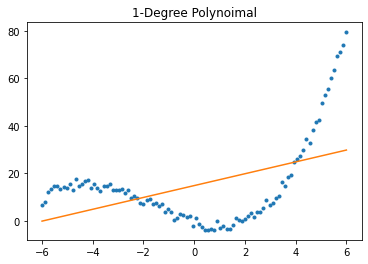

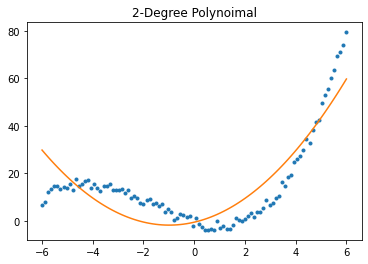

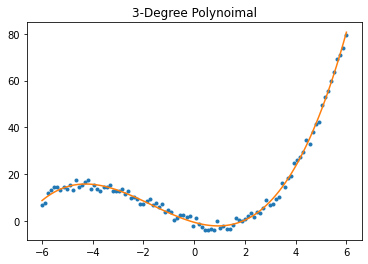

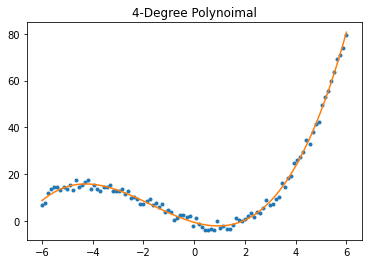

In [ ]:
## Data generation

x=np.linspace(-6,6,100)
x=x[np.newaxis,:].T

w = np.array([[-3],[-3],[1.25],[0.25]]) ## Define Weights as per the given equation

## Function to transform the data into polynomial

m, n = x.shape
def data_transform(X,degree): 
  X_hat = X
  ## Write your code here
  X0 = np.ones((m,1))
  X = np.hstack((X0, X_hat))
  if degree ==0:
      X_new = X0
  elif degree ==1:
      X_new = X
  if degree>1:
    for i in range(1,degree):
      #print(i)
      X = np.hstack((X, (X[:,1]**(i+1)).reshape(m,1)))
      X_new = X
  return X_new

X = data_transform(x,3)
#print(X)
#print(X.shape)
X = X.T
y = X.T @ w
y = y+5*np.random.uniform(0,1,y.shape)
plt.plot(x,y,'.')

reg=regression()

# By computation

# Code for degree 0 polynomial fitting

degree = 0
X_1 = data_transform(x,degree)
X_1 = X_1.T
w_mat=reg.mat_inv(y,X_1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x,y,'.')
plt.plot(x,y_pred)
plt.title('0-Degree Polynoimal')


# Write the code for degree 1 polynomial fitting
# degree-1 
degree = 1
X_2 = data_transform(x,degree)
X_2 = X_2.T
w_mat=reg.mat_inv(y,X_2)
y_pred=X_2.T @ w_mat
plt.figure()
plt.plot(x,y,'.')
plt.plot(x,y_pred)
plt.title('1-Degree Polynoimal')

# Write the code for degree 2 polynomial fitting
# degree-2 
degree = 2
X_3 = data_transform(x,degree)
X_3 = X_3.T
w_mat=reg.mat_inv(y,X_3)
y_pred=X_3.T @ w_mat
plt.figure()
plt.plot(x,y,'.')
plt.plot(x,y_pred)
plt.title('2-Degree Polynoimal')

# Write the code for degree 3 polynomial fitting
# degree-3 
degree = 3
X_4 = data_transform(x,degree)
X_4 = X_4.T
w_mat=reg.mat_inv(y,X_4)
y_pred=X_4.T @ w_mat
plt.figure()
plt.plot(x,y,'.')
plt.plot(x,y_pred)
plt.title('3-Degree Polynoimal')

# Write the code for degree 4 polynomial fitting
# degree-4 
degree = 4
X_5 = data_transform(x,degree)
X_5 = X_5.T
w_mat=reg.mat_inv(y,X_5)
y_pred=X_5.T @ w_mat
plt.figure()
plt.plot(x,y,'.')
plt.plot(x,y_pred)
plt.title('4-Degree Polynoimal')



[[14.65279815]]
[[14.65281603]
 [ 2.49259696]]
[[-0.24222745]
 [ 2.49259696]
 [ 1.24248564]]
[[-0.24550199]
 [-3.02881486]
 [ 1.2426345 ]
 [ 0.25067193]]
[[ 7.54743669e-01]
 [ 2.94883426e-01]
 [-1.07165597e+00]
 [-1.82895429e-02]
 [-3.49658306e+01]]


Text(0.5, 1.0, '4-Degree Polynoimal')

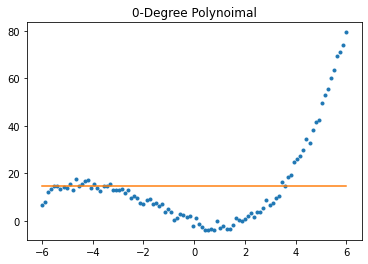

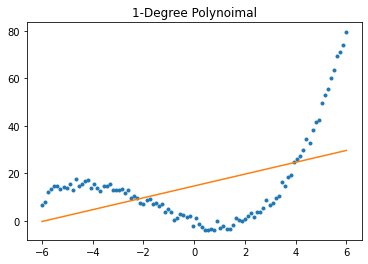

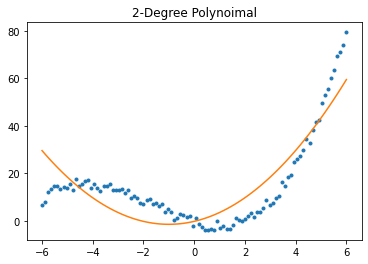

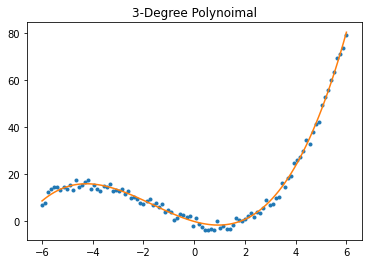

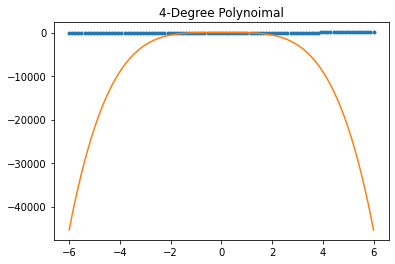

In [ ]:
# By Gradient Descent 
lr=0.0001
#plt.plot(error_grad)
## Write your code here
# Code for degree 0 polynomial fitting

degree = 0
X_1 = data_transform(x,degree)
X_1 = X_1.T
w_pred,error_grad=reg.Regression_grad_des(X_1,y,lr)
print(w_pred)
y_pred=X_1.T @ w_pred
plt.figure()
plt.plot(x,y,'.')
plt.plot(x,y_pred)
plt.title('0-Degree Polynoimal')


# Write the code for degree 1 polynomial fitting
# degree-1 
degree = 1
X_2 = data_transform(x,degree)
X_2 = X_2.T
w_pred,error_grad=reg.Regression_grad_des(X_2,y,lr)
print(w_pred)
y_pred=X_2.T @ w_pred
plt.figure()
plt.plot(x,y,'.')
plt.plot(x,y_pred)
plt.title('1-Degree Polynoimal')

# Write the code for degree 2 polynomial fitting
# degree-2 
degree = 2
X_3 = data_transform(x,degree)
X_3 = X_3.T
w_pred,error_grad=reg.Regression_grad_des(X_3,y,lr)
print(w_pred)
y_pred=X_3.T @ w_pred
plt.figure()
plt.plot(x,y,'.')
plt.plot(x,y_pred)
plt.title('2-Degree Polynoimal')

# Write the code for degree 3 polynomial fitting
# degree-3 
degree = 3
X_4 = data_transform(x,degree)
X_4 = X_4.T
w_pred,error_grad=reg.Regression_grad_des(X_4,y,lr)
print(w_pred)
y_pred=X_4.T @ w_pred
plt.figure()
plt.plot(x,y,'.')
plt.plot(x,y_pred)
plt.title('3-Degree Polynoimal')

# Write the code for degree 4 polynomial fitting
# degree-4 
degree = 4
X_5 = data_transform(x,degree)
X_5 = X_5.T
w_pred,error_grad=reg.Regression_grad_des(X_5,y,lr)
print(w_pred)
y_pred=X_5.T @ w_pred
plt.figure()
plt.plot(x,y,'.')
plt.plot(x,y_pred)
plt.title('4-Degree Polynoimal')

# Linear Regression

  Generate the data as shown in the figure below


(200,)

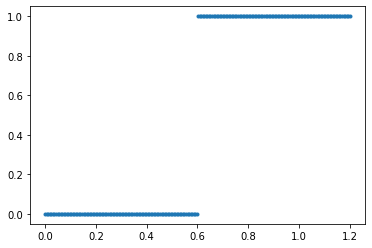

In [ ]:
## Write your code here
x = np.linspace(0,1.2,200)
y=np.zeros(x.shape)
y[np.where(x>0.6)]=1
plt.plot(x,y,'.')
x.shape

  Use the Regression class defined in the previous lab to fit the curve

In [ ]:
## Write your Code here

  Augment the Data and generate optimal weights

In [ ]:
## Write your Code here
x=x[np.newaxis,:]
x_aug = np.concatenate((np.ones((1,x.shape[1])), x),axis=0)
print(x.shape)
print(x_aug.T.shape)
y_act = y
print(y_act.shape)

(1, 200)
(200, 2)
(200,)


Using the optimal weights, fit the curve

In [ ]:
y = y[:,np.newaxis]
y.shape

(200, 1)

In [ ]:
def color(y_label):
  colors=['red','green']
  if y_label>0.5:
    c = colors[0] 
  else:
    c= colors[1]
  return c 

(200, 1)
(2, 1)
[[-0.24626866]
 [ 1.24378109]]


<Figure size 432x288 with 0 Axes>

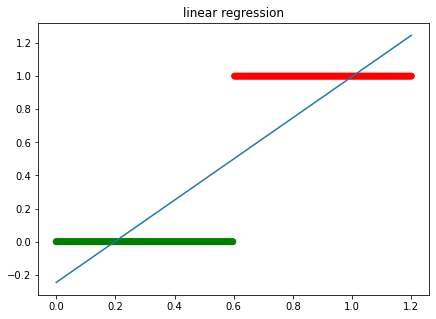

In [ ]:
w_mat=reg.mat_inv(y,x_aug)
y_pred=x_aug.T @ w_mat
y_label = np.zeros(y_pred.shape)
y_label[np.where(y_pred>0.5)]=1
plt.figure()
#plt.plot(x.T,y,'.')
colors=[]
fig, ax = plt.subplots(figsize=(7, 5))
for i in y_label:
  c=color(i)
  colors.append(c)
ax.scatter(x.T, y_label, c=colors)
plt.plot(x.T,y_pred)
plt.title('linear regression')
print(y_pred.shape)
print(w_mat.shape)
print(w_mat)

(2, 1)
[[-0.14664293]
 [ 1.09217254]]
(200, 1)


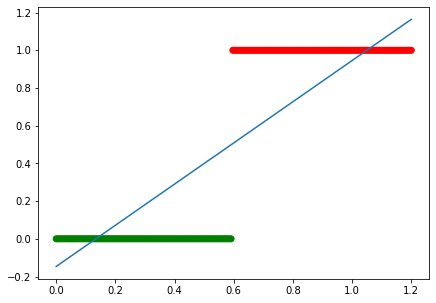

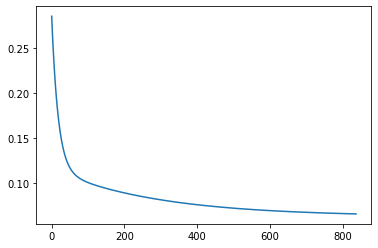

In [ ]:
## Write your Code here
w =np.array([[-5],[0]])
reg=regression()
# By Gradien descent
lr=0.01
w_pred,error_grad=reg.Regression_grad_des(x_aug,y,lr)
print(w_pred.shape)
print(w_pred)
colors=[]
y_pred = x_aug.T @w_pred
y_label = np.zeros(y_pred.shape)
y_label[np.where(y_pred>0.5)]=1
#y_label[np.where(y_pred<0.5)]=0
print(y_pred.shape)
fig, ax = plt.subplots(figsize=(7, 5))
for i in y_label:
  c=color(i)
  colors.append(c)
ax.scatter(x.T, y_label, c=colors)
plt.plot(x.T,y_pred)
plt.show()
plt.plot(error_grad)
plt.show()

# Drawback of Linear regression based Classificaton

  Generate the Data as shown in the figure and follow the same steps as above to fit a curve using regression class 

(120,)
(120,)


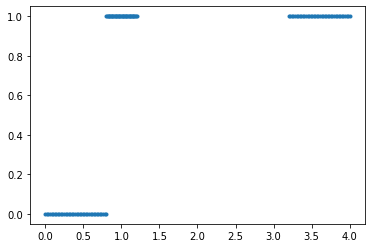

In [ ]:
## Write your code here
#x = np.linspace(0,4,120) 
x1 = np.linspace(0,0.8,40)
y1 = np.zeros(x1.shape)
x2 = np.linspace(0.8,1.2,40)
y2 = np.ones(x2.shape)
x3 = np.linspace(3.2,4.0,40)
y3 = np.ones(x3.shape)
x = np.hstack((x1,x2,x3))
print(x.shape)
y = np.hstack((y1,y2,y3))
print(y.shape)
plt.plot(x,y,'.')

In [ ]:
x =x[np.newaxis,:]
y = y[:,np.newaxis]
x_aug = np.concatenate((np.ones((1,x.shape[1])), x),axis=0)
print(x.shape)
print(x_aug.shape)
print(y.shape)

(1, 120)
(2, 120)
(120, 1)


(2, 1)
[[0.34969605]
 [0.19898567]]
(120, 1)


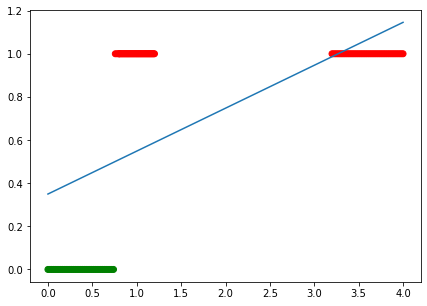

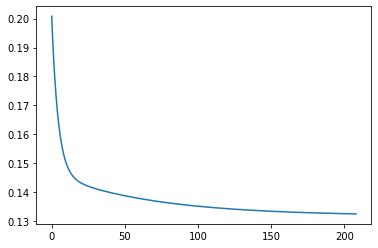

In [ ]:
## Write your Code here
w =np.array([[-5],[0]])
reg=regression()
# By Gradien descent
lr=0.01
w_pred,error_grad=reg.Regression_grad_des(x_aug,y,lr)
print(w_pred.shape)
print(w_pred)
colors=[]
y_pred = x_aug.T @w_pred
y_label = np.zeros(y_pred.shape)
y_label[np.where(y_pred>0.5)]=1
#y_label[np.where(y_pred<0.5)]=0
print(y_pred.shape)
fig, ax = plt.subplots(figsize=(7, 5))
for i in y_label:
  c=color(i)
  colors.append(c)
ax.scatter(x.T, y_label, c=colors)
plt.plot(x.T,y_pred)
plt.show()
plt.plot(error_grad)
plt.show()

# Logistic regression

  Error Surface (Comparison between Logistic Loss and Mean Squared Error)

(25,)
(25,)


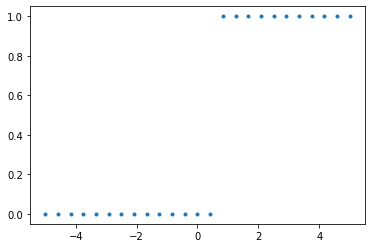

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x=np.linspace(-5,5,25)
y=np.zeros(x.shape)
y[np.where(x>0.7314)]=1

plt.plot(x,y,'.')
print(x.shape)
print(y.shape)

1. MSE=$\frac{1}{2N}\sum_{i=1}^{N}(y^{p}_{i}-y_{i})^2$, where $y^{p}=\frac{1}{1+e^{-w^{T}x}}$
2. Logistic loss=$-\frac{1}{N}\sum_{i=1}^{N}y_{i}log(y^{p}_{i})+(1-y_{i})log(1-y_{i}^{p})$

In [ ]:
x = x[:,np.newaxis]
y = y[:,np.newaxis]
w1_in=10/(x[1]-x[0])
w0=-w1_in*0.7314
w1=np.linspace(-w1_in,4*w1_in,100)
print(x.shape,y.shape)

(25, 1) (25, 1)


In [ ]:
print(y[24])

[1.]


In [ ]:
# search space (only w1 is searched, where as w0 is fixed)

w1_in=10/(x[1]-x[0])
w0=-w1_in*0.7314
w1=np.linspace(-w1_in,4*w1_in,100)
print(w1.shape[0])
#y = x@w
mse =0
loss =0
cost_fn_mse=[]
cost_fn_logis=[]
def sigmoid(x, weight):
  z = np.dot(weight,x)+w0
  return 1 / (1 + np.exp(-z))
def logistic_loss(weight,x, y):
  
  return (y * np.log(sigmoid(x,weight)) + (1 - y) * np.log(1 - sigmoid(x,weight)))

def MSE(weight, x, y):
  return (sigmoid(x,weight) - y)**2
for i in range(w1.shape[0]):
  mse =0 
  loss =0
  for j in range(x.shape[0]):
    # Write your code here
    mse += MSE(w1[i],x[j],y[j])
    if y[j]==1:
      loss+= y[j] * np.log(sigmoid(x[j],w1[i]))
    else:
      #y[j]==0
      loss+= (1 - y[j]) * np.log(1 - sigmoid(x[j],w1[i]))
    #else:
      #loss += logistic_loss(w1[i],x[j],y[j])
    #loss = np.nan_to_num(loss)
  mse = mse*(1/(2*len(x)))
  loss = loss*(-1/(len(x)))
  cost_fn_mse.append(mse) 
  cost_fn_logis.append((loss))
print(cost_fn_logis)



100
[array([inf]), array([inf]), array([inf]), array([inf]), array([inf]), array([inf]), array([inf]), array([inf]), array([inf]), array([inf]), array([inf]), array([27.92814842]), array([24.96572488]), array([22.06452186]), array([19.24430808]), array([16.55437108]), array([14.09745188]), array([12.10367464]), array([10.52367112]), array([8.96802881]), array([7.41247292]), array([5.85692035]), array([4.30223322]), array([2.86907028]), array([1.97493617]), array([1.43217978]), array([1.07165101]), array([0.81699941]), array([0.63012386]), array([0.4883941]), array([0.38049585]), array([0.29103261]), array([0.2227508]), array([0.17272166]), array([0.13074492]), array([0.09237477]), array([0.0582633]), array([0.0314984]), array([0.01448406]), array([0.00591002]), array([0.00227411]), array([0.00087604]), array([0.00037598]), array([0.00022815]), array([0.00023369]), array([0.00033417]), array([0.00053321]), array([0.00087284]), array([0.00143367]), array([0.00234757]), array([0.003818]),

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log


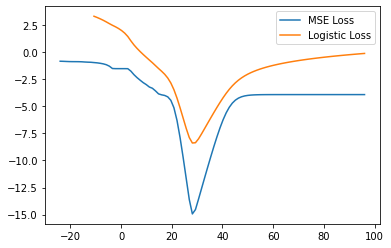

In [ ]:
# Ploting of error surface
plt.figure()
plt.plot(w1,np.log(cost_fn_mse),label='MSE Loss')
#plt.show()
plt.plot(w1,np.log(cost_fn_logis),label = 'Logistic Loss')
plt.legend()

**Solving the Outlier Issue**

  Generate the Data as shown in the figure

(120,)
(120,)


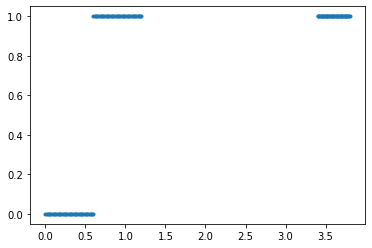

In [ ]:
## Write your Code here
x1 = np.linspace(0,0.6,40)
y1 = np.zeros(x1.shape)
x2 = np.linspace(0.6,1.2,40)
y2 = np.ones(x2.shape)
x3 = np.linspace(3.4,3.8,40)
y3 = np.ones(x3.shape)
x = np.hstack((x1,x2,x3))
print(x.shape)
y = np.hstack((y1,y2,y3))
print(y.shape)
plt.plot(x,y,'.')

Define a Logistic Regression class

In [ ]:
class logis_regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def logis(self,x,w_old):
    #print(x.T.shape)
    #print(w_old.shape)
    # write code here
    z = np.dot(x.T, w_old)
    op = 1 / (1 + np.exp(-z))
    return op

  def grad_update(self,w_old,lr,y,x):
    # write code here
    N = len(x)
    y_hat = self.logis(x, w_old)
    w_old -= lr * np.dot(x,  y_hat - y) / N 
    return w_old

  def error(self,w_old,y,x):
    predict_1 = y * np.log(self.logis(x,w_old))
    predict_0 = (1 - y) * np.log(1 - self.logis(x,w_old))
    return -sum(predict_1 + predict_0) / len(x)
    

  def Regression_grad_des(self,x,y,lr):
    diff1=1
    diff2=0
    loss = []
    w_old = np.random.rand(x.shape[0],1)
    #print(w_old.shape)
    for i in range(1000):
      # write code here
      diff1 = self.error(w_old,y,x)
      w_old = self.grad_update(w_old,lr,y,x)    
      diff2 = self.error(w_old,y,x)
      loss.append(diff1)
      w_pred = w_old
      err = loss
      dev=np.abs(diff1-diff2)
          
      if dev<=10**(-20):
        break

    return w_pred,err
  
  def predict(self, x,w_pred):
    # Predicting with sigmoid function
    
    # Returning binary result
    return [1 if i > 0.5 else 0 for i in self.logis(x,w_pred)]

Augment the data and fit the curve by obtaining optimal weights (Using Gradient Descent)

In [ ]:
x =x[np.newaxis,:]
y = y[:,np.newaxis]
x_aug = np.concatenate((np.ones((1,x.shape[1])), x),axis=0)
print(x.shape)
print(x_aug.shape)
print(y.shape)

(1, 120)
(2, 120)
(120, 1)


In [ ]:
x_aug.shape[0]

2

[[-5.91636875]
 [ 9.97653914]]


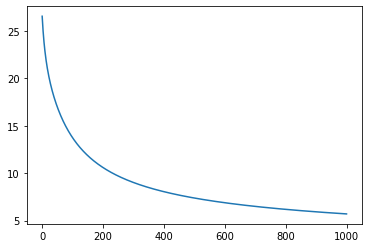

In [ ]:
## Write your code here
reg = logis_regression()

# By Gradien descent
lr=0.01
w_pred,error_grad=reg.Regression_grad_des(x_aug,y,lr)
print(w_pred)

plt.plot(error_grad)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


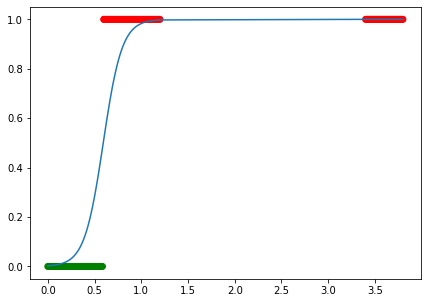

In [ ]:
from numpy import log, dot, e
y_label = reg.predict(x_aug,w_pred)
y_pred = reg.logis(x_aug,w_pred)
print(y_label)
#plt.plot(x.T,y_pred,'.')
colors=[]
fig, ax = plt.subplots(figsize=(7, 5))
def color(y_label):
  colors=['red','green']
  if y_label>0.5:
    c = colors[0] 
  else:
    c= colors[1]
  return c 
for i in y_label:
  c=color(i)
  colors.append(c)
ax.scatter(x.T, y_label, c=colors)
plt.plot(x.T,y_pred)

# Classification of circularly separated data using logistic regression



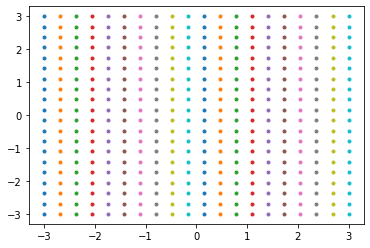

In [ ]:
x1=np.linspace(-3,3,20)
x2=np.linspace(-3,3,20)

x11,x22=np.meshgrid(x1,x2)
plt.plot(x11,x22,'.')

  Using the above data generate circular data

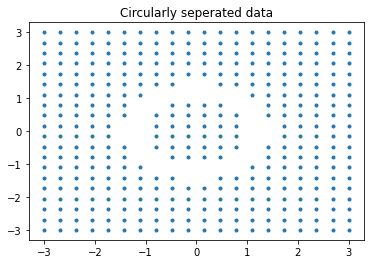

In [ ]:
x1 = x11.flatten()
x2 = x22.flatten()
x = np.concatenate((x1[:,np.newaxis],x2[:,np.newaxis]),axis=1)
a = np.where((x[:,0]**(2)+x[:,1]**(2))<=0.9)
b = np.where((x[:,0]**(2)+x[:,1]**(2))>=2.2)
x1 = x[a[0],:]
x2 = x[b[0],:]
x = np.concatenate((x1,x2))
plt.plot(x[:,0],x[:,1],'.')
plt.title("Circularly seperated data")
plt.show()

As in case of circularly separated data, the boundary is nonlinear, so squared feature is taken.

Shape of Augmented x : (5, 364)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply


[[-4.88381514e+00]
 [ 6.37052763e-04]
 [ 1.35534827e-04]
 [ 3.35350470e+00]
 [ 3.35311212e+00]]


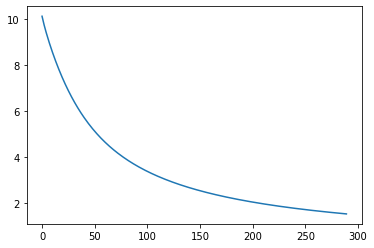

In [ ]:
# perform logistic regression
y1=np.zeros((x1.shape[0]))
y2=np.ones((x2.shape[0]))
y=np.concatenate((y1,y2))
y = y[:,np.newaxis]
x_aug = np.concatenate((np.ones((1,x.shape[0])),x.T,(x**2).T),axis=0)
print('Shape of Augmented x :',x_aug.shape)
reg = logis_regression()

# By Gradien descent
lr=0.01
w_pred,error_grad=reg.Regression_grad_des(x_aug,y,lr)
print(w_pred)

plt.plot(error_grad)

Plot classification using 0.5 as threshold

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

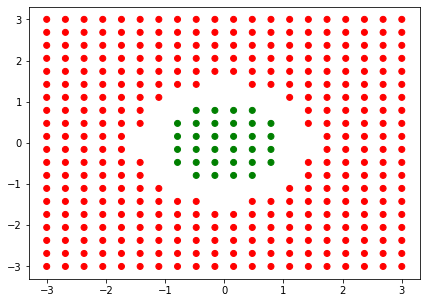

In [ ]:
#write code here
y_label = reg.predict(x_aug,w_pred)
y_pred = reg.logis(x_aug,w_pred)
print(y_label)
#plt.plot(x.T,y_pred,'.')
colors=[]
fig, ax = plt.subplots(figsize=(7, 5))
def color(y_label):
  colors=['red','green']
  if y_label>0.5:
    c = colors[0] 
  else:
    c= colors[1]
  return c 
for i in y_label:
  c=color(i)
  colors.append(c)
ax.scatter(x[:,0], x[:,1], c=colors)
#plt.plot(x.T,y_pred)

# Multiclass logistic regression

1. Generate 1D data with 3 classes


### One vs rest classification

1. Lets take a polynomial of order 2 (by seeing the data distribution)

(300,)


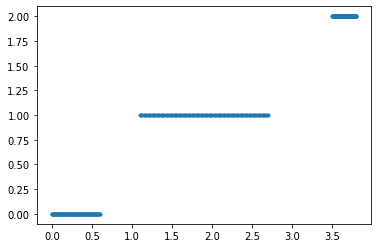

In [ ]:
## Write your code here

import numpy as np
import matplotlib.pyplot as plt

x1=np.linspace(0,0.6,100)
x2=np.linspace(1.1,2.7,100)
x3=np.linspace(3.5,3.8,100)

x=np.concatenate((x1,x2,x3))
print(x.shape)

y1=np.zeros(x1.shape)
y2=np.ones(x2.shape)
y3=np.tile([2],x3.shape)

y=np.concatenate((y1,y2,y3))

plt.figure()
plt.plot(x,y,'.')


In [ ]:
# def data_transform(X,degree): 
#   X_new=[]      
#   for i in range(degree +1):
#     # write code here to generate a polynomial

def data_transform(X,degree): 
  X_new=[]      
  for i in range(degree +1):
    X_new.append(X**i)              
  X_new = np.concatenate(X_new)  
  return X_new

x_aug=data_transform(x[np.newaxis,:],2)
print(x_aug.shape)

(3, 300)


In [ ]:
class logis_regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def logis(self,x,w_old):
    #print(x.T.shape)
    #print(w_old.shape)
    # write code here
    z = np.dot(x.T, w_old)
    op = 1 / (1 + np.exp(-z))
    return op

  def grad_update(self,w_old,lr,y,x):
    # write code here
    N = len(x)
    y_hat = self.logis(x, w_old)
    w_old -= lr * np.dot(x,  y_hat - y) / N 
    return w_old

  def error(self,w_old,y,x):
    predict_1 = y * np.log(self.logis(x,w_old))
    predict_0 = (1 - y) * np.log(1 - self.logis(x,w_old))
    return -sum(predict_1 + predict_0) / len(x)
    

  def Regression_grad_des(self,x,y,lr):
    diff1=1
    diff2=0
    loss = []
    w_old = np.random.rand(x.shape[0],1)
    #print(w_old.shape)
    for i in range(1000):
      # write code here
      diff1 = self.error(w_old,y,x)
      w_old = self.grad_update(w_old,lr,y,x)    
      diff2 = self.error(w_old,y,x)
      loss.append(diff1)
      w_pred = w_old
      err = loss
      dev=np.abs(diff1-diff2)
          
      if dev<=10**(-20):
        break

    return w_pred,err
  
  def predict(self, x,w_pred):
    # Predicting with sigmoid function
    
    # Returning binary result
    return [1 if i > 0.5 else 0 for i in self.logis(x,w_pred)]

In [ ]:
# plot for classification
def plot_op(x,y_pred):

  ind0,_=np.where(y_pred<0.5)
  ind1,_=np.where(y_pred>=0.5)
  x0=x[ind0,:]
  x1=x[ind1,:]
  plt.plot(x0,np.zeros((x0).shape),'o',color='y')
  plt.plot(x1,np.ones((x1).shape),'x',color='r')
  

Using the above function for plotting, plot the curve using different configurations

(300,)
(300, 1)


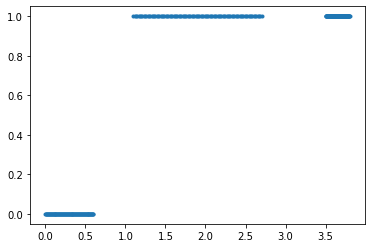

In [ ]:

y3_new = y2
y_class_01 = np.concatenate((y1,y2,y3_new))
#print(y_class_01)

print(y.shape)
plt.plot(x,y_class_01,'.')
y_class_01=y_class_01[:,np.newaxis]
print(y_class_01.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply


[[-3.27807126]
 [ 0.59662406]
 [ 2.91841729]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


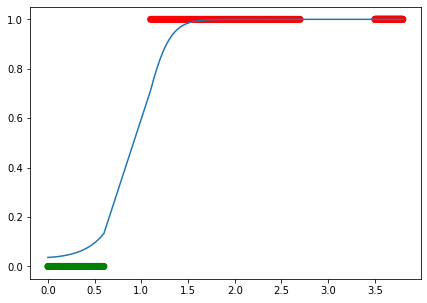

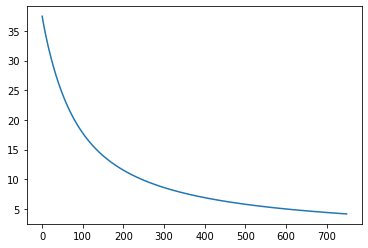

In [ ]:
# take class 0 as '0' and other to '1'
## Write your code here
reg = logis_regression()

# By Gradient descent
lr=0.001
w_pred,error_grad=reg.Regression_grad_des(x_aug,y_class_01,lr)
print(w_pred)
from numpy import log, dot, e
y_label = reg.predict(x_aug,w_pred)
y_pred = reg.logis(x_aug,w_pred)
print(y_label)
#plt.plot(x.T,y_pred,'.')
colors=[]
fig, ax = plt.subplots(figsize=(7, 5))
def color(y_label):
  colors=['red','green']
  if y_label>0.5:
    c = colors[0] 
  else:
    c= colors[1]
  return c 
for i in y_label:
  c=color(i)
  colors.append(c)
ax.scatter(x.T, y_label, c=colors)
plt.plot(x.T,y_pred)
plt.show()
plt.plot(error_grad)
plt.show()

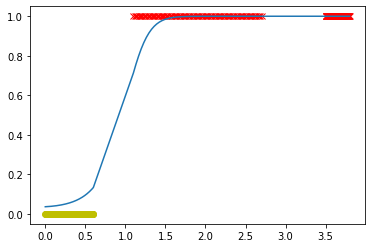

In [ ]:
plot_op(x[:,np.newaxis],y_pred)
plt.plot(x.T,y_pred)

(300,)
(300, 1)


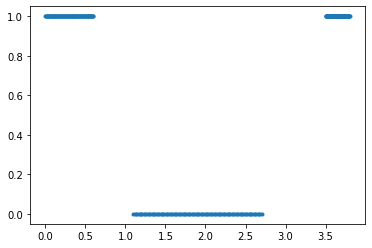

In [ ]:
y3_new = y2
y1_new = y2
y2_new =y1
y_class_101 = np.concatenate((y1_new,y2_new,y3_new))
#print(y_class_101)
print(y.shape)
plt.plot(x,y_class_101,'.')
y_class_101=y_class_101[:,np.newaxis]
print(y_class_101.shape)


[[ 2.97910526]
 [-5.16182043]
 [ 1.40495112]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


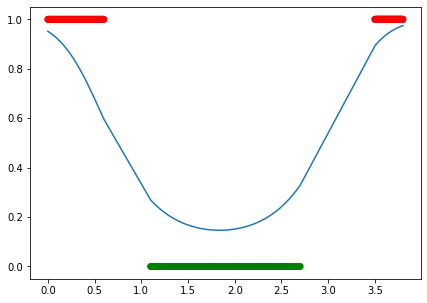

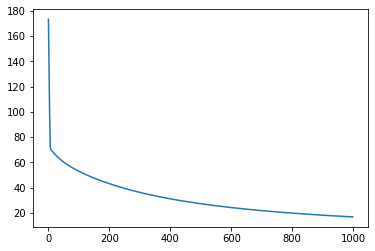

In [ ]:
# take class 1 as '0' and other to '1'
## Write your code here
# take class 0 as '0' and other to '1'
## Write your code here
reg = logis_regression()

# By Gradient descent
lr=0.001
w_pred,error_grad=reg.Regression_grad_des(x_aug,y_class_101,lr)
print(w_pred)
from numpy import log, dot, e
y_label = reg.predict(x_aug,w_pred)
y_pred = reg.logis(x_aug,w_pred)
print(y_label)
#plt.plot(x.T,y_pred,'.')
colors=[]
fig, ax = plt.subplots(figsize=(7, 5))
def color(y_label):
  colors=['red','green']
  if y_label>0.5:
    c = colors[0] 
  else:
    c= colors[1]
  return c 
for i in y_label:
  c=color(i)
  colors.append(c)
ax.scatter(x.T, y_label, c=colors)
plt.plot(x.T,y_pred)
plt.show()
plt.plot(error_grad)
plt.show()

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(300,)
(300, 1)


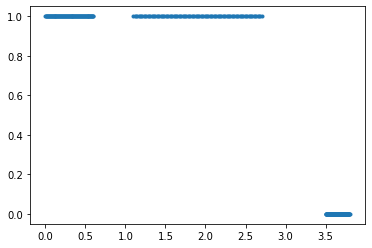

In [ ]:
# Take class 2 as '0' and other to '1'
y3_new = y1
y1_new = y2
y2_new = y2
y_class_110 = np.concatenate((y1_new,y2_new,y3_new))
print(y_class_110)
print(y.shape)
plt.plot(x,y_class_110,'.')
y_class_110=y_class_110[:,np.newaxis]
print(y_class_110.shape)


[[ 4.05897907]
 [ 2.63140389]
 [-1.34067715]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


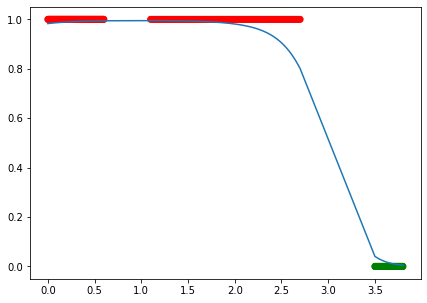

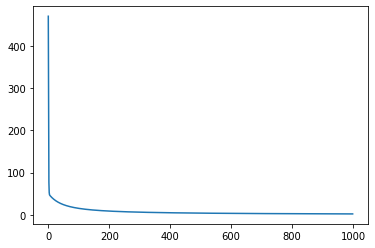

In [ ]:
# Take class 2 as '0' and other to '1'
## Write your code here

reg = logis_regression()

# By Gradient descent
lr=0.001
w_pred,error_grad=reg.Regression_grad_des(x_aug,y_class_110,lr)
print(w_pred)
from numpy import log, dot, e
y_label = reg.predict(x_aug,w_pred)
y_pred = reg.logis(x_aug,w_pred)
print(y_label)
#plt.plot(x.T,y_pred,'.')
colors=[]
fig, ax = plt.subplots(figsize=(7, 5))
def color(y_label):
  colors=['red','green']
  if y_label>0.5:
    c = colors[0] 
  else:
    c= colors[1]
  return c 
for i in y_label:
  c=color(i)
  colors.append(c)
ax.scatter(x.T, y_label, c=colors)
plt.plot(x.T,y_pred)
plt.show()
plt.plot(error_grad)
plt.show()

In [ ]:
x = x[:,np.newaxis]
print(x.shape)
y= y[:,np.newaxis]
print(np.unique(y))
print(y.shape)

(300, 1)
[0. 1. 2.]
(300, 1)


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def fit(x, y, max_iter=1000, alpha=0.01):
    #x = np.insert(x, 0, 1, axis=1)
    w_pred_class = []
    classes = np.unique(y)
    costs = np.zeros(max_iter)

    for c in classes:
        # one vs. rest binary classification
        binary_y = np.where(y == c, 1, 0)
        #print(binary_y)
        
        w_pred = np.zeros(x.shape[0])
        w_pred,error_grad=reg.Regression_grad_des(x,binary_y,alpha)
            
        w_pred_class.append(w_pred)
    return w_pred_class, classes, error_grad
def predict(classes, w_pred_class, x):
    #x = np.insert(x, 0, 1, axis=1)
    #print(x.shape)
    preds = [np.argmax(
        [sigmoid(w_pred.T@xi) for w_pred in w_pred_class]
    ) for xi in x]
    print(preds)
    return [classes[p] for p in preds]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply


[0. 1. 2.]
[array([[ 6.26077535],
       [-0.8360568 ],
       [-6.38806486]]), array([[-8.47328459],
       [13.30015168],
       [-3.40614464]]), array([[-5.99452403],
       [-5.4740116 ],
       [ 2.43818787]])]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

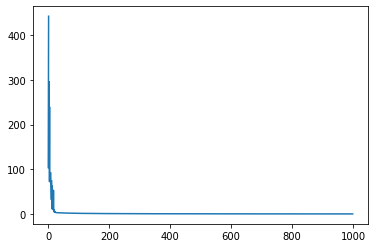

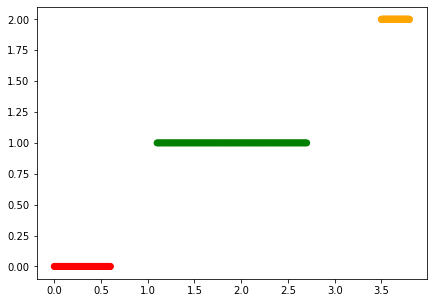

In [ ]:
w_preds, y_labels,error = fit(x_aug,y)
#classes= []
print(y_labels)
print(w_preds)
#print(np.asarray(w_preds).shape)
classes = predict(y_labels,w_preds,x_aug.T)
#print(np.unique(classes))
plt.plot(error)
plt.show()
colors=[]
fig, ax = plt.subplots(figsize=(7, 5))
def color(y_label):
  colors=['red','green','orange']
  if y_label==0:
    c = colors[0] 
  elif y_label ==1:
    c= colors[1]
  else:
    c = colors[2]
  return c 
for i in classes:
  c=color(i)
  colors.append(c)
ax.scatter(x, classes, c=colors)
#plt.plot(x,classes,'.')
